In [1]:
from hexlattice import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hexagonal lattice geometry for optics tube placement
Following conventions outlined in https://www.redblobgames.com/grids/hexagons/#hex-to-pixel, it is possible to parametrize the positions of the center cameras in a hex pattern.

I also parametrize this kind of lattice based on the number of hexagonal rings counting from the center out, this will be helpful to give meaningful labels to the optics designs.

The purpose of this is to write code that can generate a zemax file given a desired camera pitch to fully populate the focal plane. This will allow for further modifications and mechanical design iterations.

The general formula for a hexagonal lattice in the pointy top configuration is:
$$\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix} \sqrt{3} & \sqrt{3}/2 \\ 0 & 3/2 \end{bmatrix} \begin{bmatrix}q \\ r\end{bmatrix}$$
Here, q and r are integers. from 0 to the order one is interested in. 

This formula allows for the creation of diamod-shaped hexagonal latices. In the python code attached (see hexlattice.py) I implemented a few functions that clip this diamond and returns the rings I promised.

# Pitch formula

For a given pitch "c" (center to center distance), the scale parameter that is needed in this formula is given by 
$$scale = \frac{c}{\sqrt{3}}$$.
For example, if we want a center separation of $220 \rm{mm}$ the scale parameter is given by $$scale=127.017$$

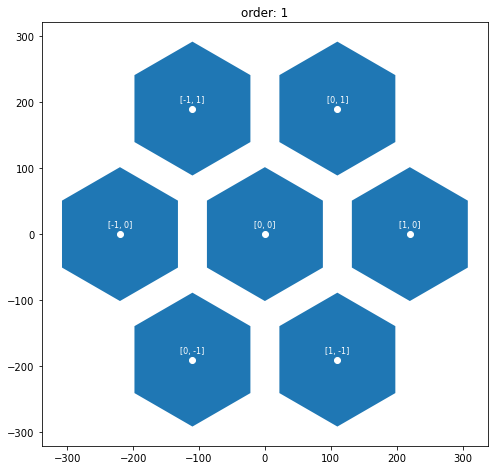

In [2]:
order = 1
scale = 220/np.sqrt(3)
df = gen_hex_layout(order, scale=scale)

plot_df(df, scale, order)

In [3]:
df['angle'] = np.rad2deg(np.arctan2(df.y, df.x))

In [4]:
df

,x,y,hex_x,hex_y,angle
0,-220.0,0.000000,-1,0,180.0
1,-110.0,190.525589,-1,1,120.0
2,-110.0,-190.525589,0,-1,-120.0
3,0.0,0.000000,0,0,0.0
4,110.0,190.525589,0,1,60.0
5,110.0,-190.525589,1,-1,-60.0
6,220.0,0.000000,1,0,0.0


In [5]:
sel = df.angle < 0
df.angle[sel] = df.angle[sel] + 360

C:\Users\pgall\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df.angle.sort_values()

3      0.0
6      0.0
4     60.0
1    120.0
0    180.0
2    240.0
5    300.0
Name: angle, dtype: float64

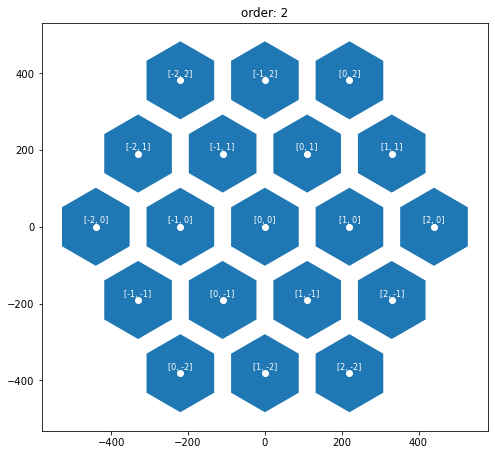

In [7]:
order = 2
df = gen_hex_layout(order, scale=scale)
plot_df(df, scale, order)

In [8]:
df.sort_values('y')

,x,y,hex_x,hex_y
16,220.0,-381.051178,2,-2
12,0.0,-381.051178,1,-2
7,-220.0,-381.051178,0,-2
3,-330.0,-190.525589,-1,-1
13,110.0,-190.525589,1,-1
17,330.0,-190.525589,2,-1
8,-110.0,-190.525589,0,-1
0,-440.0,0.000000,-2,0
14,220.0,0.000000,1,0
9,0.0,0.000000,0,0


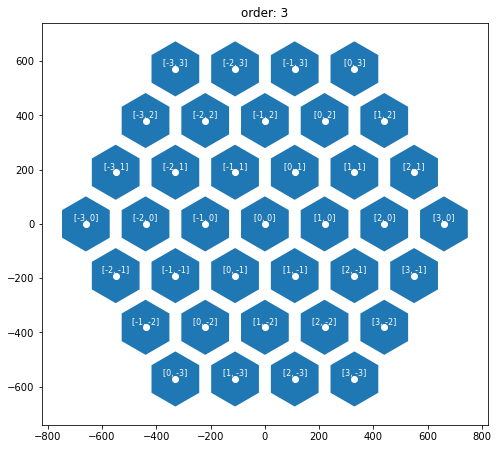

In [9]:
order = 3
df = gen_hex_layout(order, scale=scale)

plot_df(df, scale, order)

In [10]:
df

,x,y,hex_x,hex_y
0,-660.0,0.000000,-3,0
1,-550.0,190.525589,-3,1
2,-440.0,381.051178,-3,2
3,-330.0,571.576766,-3,3
4,-550.0,-190.525589,-2,-1
5,-440.0,0.000000,-2,0
6,-330.0,190.525589,-2,1
7,-220.0,381.051178,-2,2
8,-110.0,571.576766,-2,3
9,-440.0,-381.051178,-1,-2


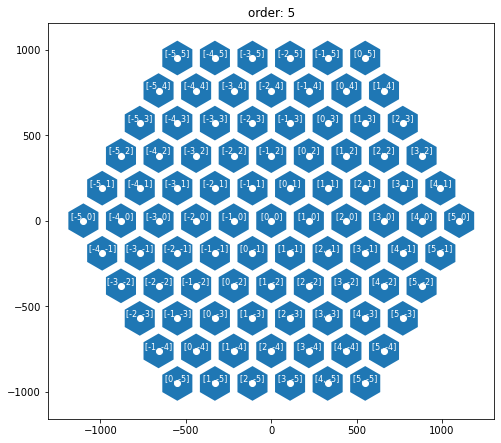

In [11]:
order = 5
df = gen_hex_layout(order, scale=scale)

plot_df(df, scale, order)

In [12]:
print(scale)

127.01705922171767
